In [4]:
pip install --no-dependencies face_recognition

Note: you may need to restart the kernel to use updated packages.


In [18]:
import face_recognition
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from skimage.feature import hog
from skimage import data,exposure
import cv2 as cv
from scipy.spatial import distance
%matplotlib inline

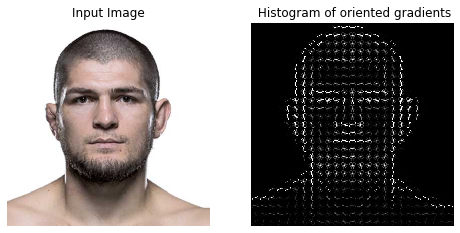

In [16]:
#
#HOG FEATURES
#
#read image
image=cv.imread('kn.jpg')
image=cv.cvtColor(image,cv.COLOR_BGR2RGB)
#fd is feature-descriptor(histogram)
fd,hog_image=hog(image, orientations=8, pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True, multichannel=True)
#plot input and hog image
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,4),sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input Image')

ax2.axis('off')
hog_image_rescaled=exposure.rescale_intensity(hog_image, in_range=(0,10))
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title(' Histogram of oriented gradients')
plt.show()

There are 1 face(s) in image
A face is located at Top:97, left:98, bottom:283, Right:284


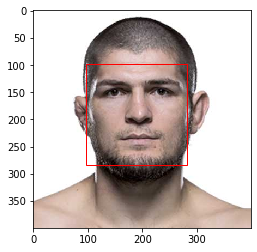

In [15]:
#
#FACE DETECTION
#
#read image
image=cv.imread('kn.jpg')
image=cv.cvtColor(image,cv.COLOR_BGR2RGB)
#determine number of faces in image
face_locations=face_recognition.face_locations(image)
number_of_faces=len(face_locations)
print("There are {} face(s) in image".format(number_of_faces))
#locate and display rectangle on faces
plt.imshow(image)
ax=plt.gca()#gets axis handle
for face_location in face_locations:
    top, right, bottom, left=face_location
    x,y,w,h=left, top, right, bottom
    print("A face is located at Top:{}, left:{}, bottom:{}, Right:{}".format(x,y,w,h))
    
    #Drawing rectangle around the face
    rect=Rectangle((x,y), w-x, h-y, fill=False, color='red')
    ax.add_patch(rect)
plt.show()    

In [23]:
#
#FACE_RECOGNITION
#
#load images
img=cv.imread('cm.jpg')
conor=cv.cvtColor(img,cv.COLOR_BGR2RGB)

img=cv.imread('kn.jpg')
khabib=cv.cvtColor(img,cv.COLOR_BGR2RGB)

img=cv.imread('nd.jpg')
nate=cv.cvtColor(img,cv.COLOR_BGR2RGB)

#face encodings database
conor_encoding=face_recognition.face_encodings(conor)[0]
khabib_encoding=face_recognition.face_encodings(khabib)[0]
nate_encoding=face_recognition.face_encodings(nate)[0]

known_face_encodings=[conor_encoding, khabib_encoding, nate_encoding]

#load test image
image=cv.imread('ufc-229.jpg')
unknown_image=cv.cvtColor(image, cv.COLOR_BGR2RGB)
unknown_face_encodings=face_recognition.face_encodings(unknown_image)

#compare each unknown face to database
for unknown_face_encoding in unknown_face_encodings:
    results=list()
    for known_face_encoding in known_face_encodings:
        d=distance.euclidean(known_face_encoding, unknown_face_encoding)
        results.append(d)
    threshold=0.6
    results=np.array(results)<=threshold
    name='unknown'
    if results[0]:
        name='Conor'
    elif results[1]:
        name='Khabib'
    elif results[2]:
        name='Nate'
    print("Found {} in the pic".format(name))    

Found Khabib in the pic
Found Conor in the pic


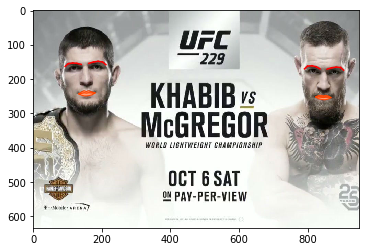

In [26]:
#
#FACIAL LANDMARKS DETECTION
#

#image read
image=cv.imread('ufc-229.jpg')
image=cv.cvtColor(image, cv.COLOR_BGR2RGB)

#identifying and displaying
face_landmarks_list=face_recognition.face_landmarks(image)
import matplotlib.lines as mlines
from matplotlib.patches import Polygon
plt.imshow(image)
ax=plt.gca()

for face_landmark in face_landmarks_list:
    #Draw a line over eyebrows
    left_eyebrow_pts=face_landmark['left_eyebrow']
    prex, prey=left_eyebrow_pts[0]
    for (x,y) in left_eyebrow_pts[1:]:
        l=mlines.Line2D([prex,x], [prey,y], color='red')
        ax.add_line(l)
        prex, prey=x, y
    
    right_eyebrow_pts=face_landmark['right_eyebrow']
    prex, prey=right_eyebrow_pts[0]
    for (x,y) in right_eyebrow_pts[1:]:
        l=mlines.Line2D([prex,x], [prey,y], color='red')
        ax.add_line(l)
        prex, prey=x, y
    
    p=Polygon(face_landmark['top_lip'], facecolor='lightsalmon', edgecolor='orangered')
    ax.add_patch(p)
    p=Polygon(face_landmark['bottom_lip'], facecolor='lightsalmon', edgecolor='orangered')
    ax.add_patch(p)
 
plt.show()